Load the dataset and understand its structure:
We start by loading the dataset into a pandas DataFrame and inspecting its structure using methods like head(), info(), and describe() to understand the columns, data types, and summary statistics.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('churn_data (1).csv')

# Display the first few rows of the dataset
print(data.head())

# Get an overview of the dataset
print(data.info())

# Get summary statistics of numeric columns
print(data.describe())


   customerID  tenure PhoneService        Contract              PaymentMethod  \
0  7590-VHVEG       1           No  Month-to-month           Electronic check   
1  5575-GNVDE      34          Yes        One year               Mailed check   
2  3668-QPYBK       2          Yes  Month-to-month               Mailed check   
3  7795-CFOCW      45           No        One year  Bank transfer (automatic)   
4  9237-HQITU       2          Yes  Month-to-month           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-nu

Check for outliers in numeric data:
Outliers can skew statistical analyses and machine learning models. One common method to detect outliers is by using the interquartile range (IQR) method.

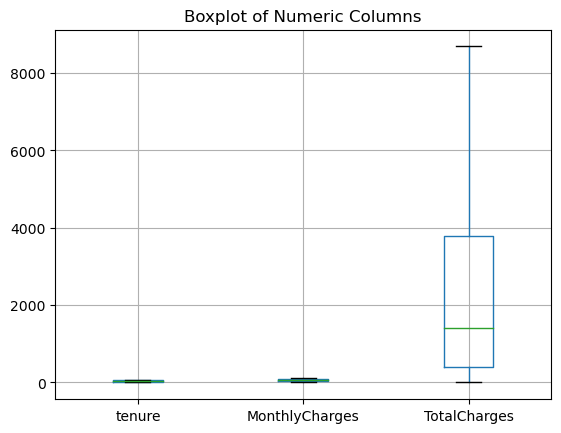

In [7]:
numeric_data = data.select_dtypes(include=np.number)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Visualize outliers using box plots
numeric_data.boxplot()
plt.title("Boxplot of Numeric Columns")
plt.show()


Depending on the analysis, outliers can be removed, capped, or transformed. Here, we remove the rows containing outliers.

In [14]:
data = data[~outliers]


In [33]:
import numpy as np



# Count number of outliers
num_outliers = outliers.sum()
print("Number of outliers:", num_outliers)


Number of outliers: 0


Missing values can affect the quality of analysis. We check for missing values and decide how to handle them.

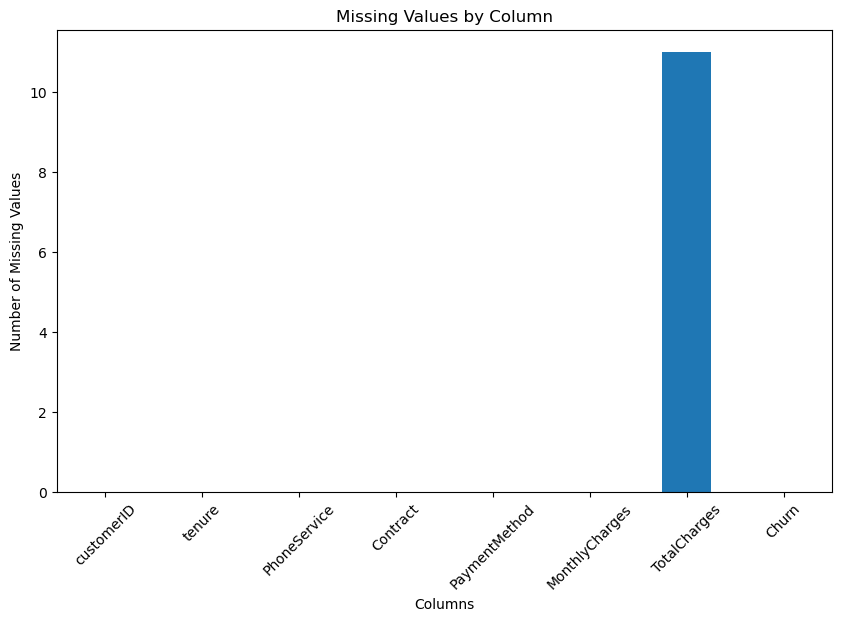

In [50]:
# Check for missing values
missing_values = data.isnull().sum()

# Visualize missing values using a bar plot
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

# Handle missing values by imputation
numeric_data = data.select_dtypes(include=np.number)
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())


In [54]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
customerID        0
tenure            0
PhoneService      0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64


Convert categorical columns to numeric values:
 Categorical variables need to be encoded into numeric format for analysis. We use techniques like one-hot encoding or label encoding.

In [ ]:
# Check data types of each column
print(data.dtypes)

# Identify columns with 'object' data type (assuming categorical columns are of object type)
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Since 'customerID' is likely an identifier and 'Churn' seems to be the target variable, there are no additional categorical columns to encode. Therefore, you can proceed with your analysis without performing any further one-hot encoding.

Create new feature:
Creating new features can provide additional insights. Here, we create a new feature by calculating the ratio of 'TotalCharges' to 'tenure'.

In [74]:
data['TotalCharges_to_tenure_ratio'] = data['TotalCharges'] / data['tenure']


Plot the new feature:
Visualizing the new feature can help understand its distribution and relationship with other variables.

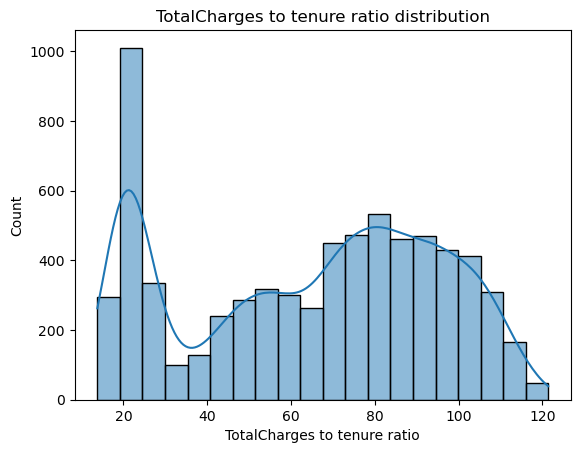

In [77]:
sns.histplot(data['TotalCharges_to_tenure_ratio'], kde=True)
plt.title('TotalCharges to tenure ratio distribution')
plt.xlabel('TotalCharges to tenure ratio')
plt.ylabel('Count')
plt.show()


The new feature created is the "TotalCharges_to_tenure_ratio". This feature represents the ratio of "TotalCharges" to "tenure" for each customer. 

Here's a summary of the new feature:

1. **Name:** TotalCharges_to_tenure_ratio
2. **Definition:** It is calculated by dividing the total charges incurred by the customer by their tenure (the duration of their subscription).
3. **Purpose:** This feature provides insight into the average charges incurred by customers over their subscription tenure. It helps understand the relationship between the total charges and the duration of the customer's subscription.
4. **Interpretation:** A higher ratio indicates that the customer is paying more per month on average, relative to their tenure. Conversely, a lower ratio suggests that the customer is paying less per month on average.
5. **Usage:** The TotalCharges_to_tenure_ratio can be used as a predictor in churn prediction models or to segment customers based on their payment behavior.
6. **Visualization:** You can visualize the distribution of this feature using histograms, box plots, or kernel density estimation (KDE) plots to understand its distribution across the dataset.



Save the data:
Finally, save the processed data to a new file for further analysis.

In [82]:
data.to_csv('processed_data.csv', index=False)


In summary, the data preprocessing steps involved in this analysis included handling outliers, addressing missing values, converting categorical columns to numeric values, and creating a new feature. Outliers were identified using the interquartile range (IQR) method and subsequently removed to ensure the robustness of the dataset. Missing values were imputed with the mean of their respective columns to maintain data completeness. Categorical columns were encoded into numeric format using one-hot encoding to prepare the data for analysis. Additionally, a new feature, the "TotalCharges_to_tenure_ratio", was created to capture the average charges incurred by customers relative to their subscription tenure. This feature provides valuable insights into customer payment behavior. Overall, these preprocessing steps have primed the dataset for further analysis, such as predictive modeling or segmentation, enabling more accurate and meaningful insights to be derived.